# Estadística descriptiva


+ **Descripción de los datos:** Los datos disponibles contienen costos médicos de personas caracterizadas por ciertos atributos.


+ **Contexto:** Aprovechar la información del cliente es primordial para la mayoría de las empresas. En el caso de una compañía de seguros, los atributos de los clientes como los mencionados a continuación pueden ser cruciales para tomar decisiones comerciales. Por lo tanto, saber explorar y generar valor a partir de dichos datos puede ser una habilidad invaluable.


+ **Variables:**
    1. **Age:** Edad del beneficiario primario
    2. **Sex:** Género del contratista de seguros
    3. **bmi:** Índice de masa corporal, que proporciona una comprensión de los pesos corporales que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal $(kg / m ^ 2)$ utilizando la relación de altura a peso, idealmente 18.5 a 24.9
    4. **Children:** Númuro de niños cubiertos
    5. **Smoker:** Fumador o no
    6. **region:** Área de residencia del beneficiario en EEUU ( northeast, southeast, southwest, northwest)
    7. **charges:** Costos médicos individuales facturados por el seguro de salud.


In [1]:
#Cargar librerias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.options.display.max_rows = 4000
from scipy.stats import chi2

In [2]:
# Cargar datos
insurance=pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()
#no hay valores missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Corroboramos los valores missing
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.shape

(1338, 7)

In [7]:
insurance.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


# Medida de TC (3 M's) y distribuciones

La medidas de tendencia central describen la base de datos a tráves de un valor o un métrica que representa la media o el centro de la districución. 


Determinamos medidas de tendencia central (3 M's=media,mediana y moda) y verificamos la destribución de las variables Age, bmi y Charges.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


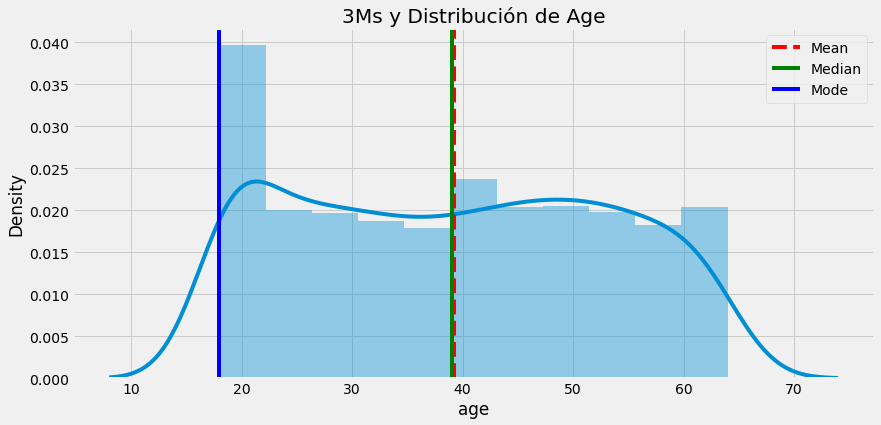

In [8]:
# Age
age_mean=insurance["age"].mean()
age_median=insurance["age"].median()
age_mode=insurance["age"].mode()


fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['age'])

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms y Distribución de Age')

plt.legend(); 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


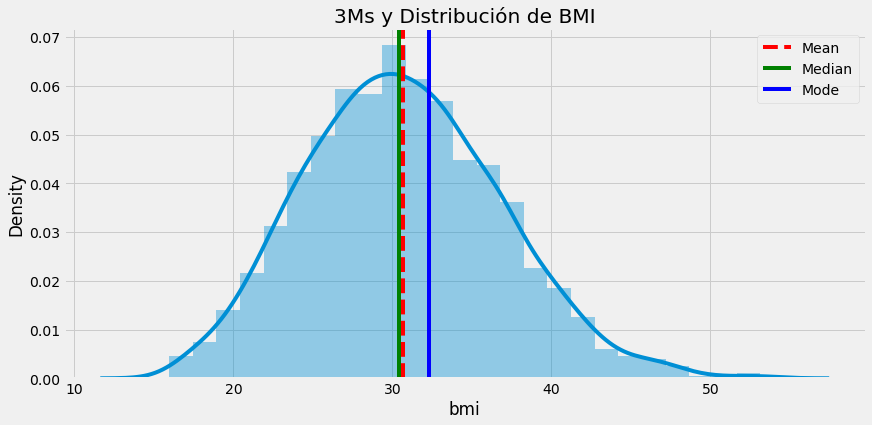

In [9]:
# BMI
bmi_mean=insurance["bmi"].mean()
bmi_median=insurance["bmi"].median()
bmi_mode=insurance["bmi"].mode()

fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['bmi'])

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms y Distribución de BMI')

plt.legend(); 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


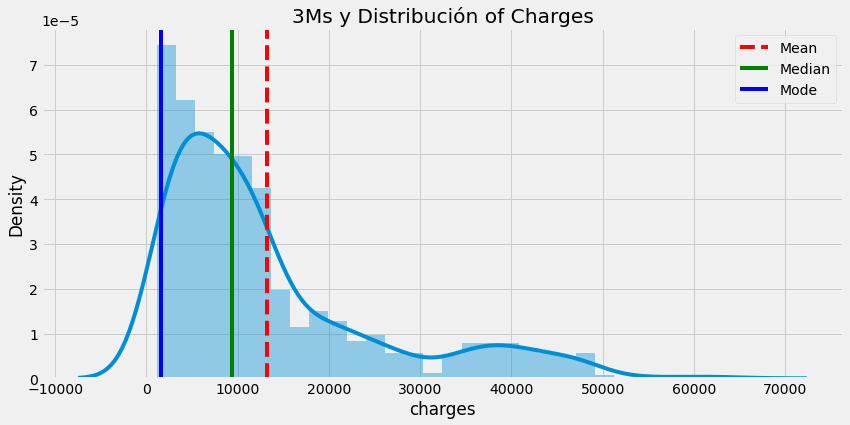

In [10]:
# Charges
charges_mean = insurance['charges'].mean()
charges_median = insurance['charges'].median()
charges_mode = insurance['charges'].mode()

fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['charges'])

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms y Distribución of Charges')

plt.legend(); plt.show()

# Medidas de Asimetría


La asimetria es una medida que nos sirve para ver que tan distinta es nuestra distribución a una normal.

Las reglas para interpretar los resultados son:
+ Una asimetría entre 0.5 y -0.5, posee una simetria bastante alta
+ Entre -1 y -0.5 o 1 y 0.5, la distribución esta moderadamente sesgada
+ Mayor a 1 o mayor a -1, es muy sesgado.





In [11]:
# coeficinte de asimetria para 'age', 'bmi' and 'charges' 
print("Skewness of 'Age': {}\n".format(insurance['age'].skew().round(3)))
print("Skewness of 'BMI': {}\n".format(insurance['bmi'].skew().round(3)))
print("Skewness of 'Charges': {}\n".format(insurance['charges'].skew().round(3)))





Skewness of 'Age': 0.056

Skewness of 'BMI': 0.284

Skewness of 'Charges': 1.516



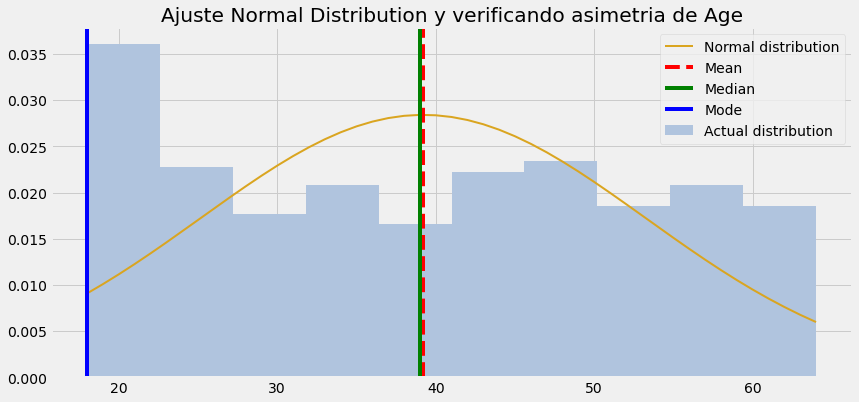

In [12]:
# Ajustanto una distribución normal 
h = np.asarray(insurance['age'])
h = sorted(h)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Ajuste Normal Distribution y verificando asimetria de Age')

plt.legend(); plt.show()

La distribución de Age posee una asimetria muy baja (0.056) por lo que su distribución es normal

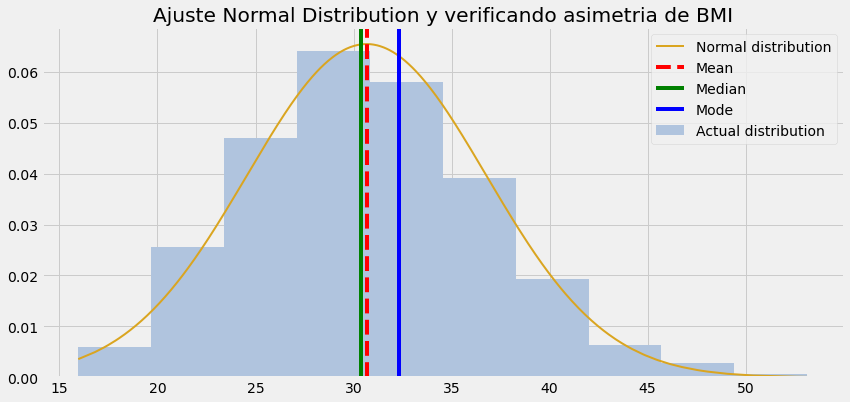

In [13]:
h = np.asarray(insurance['bmi'])
h = sorted(h)
 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Ajuste Normal Distribution y verificando asimetria de BMI')

plt.legend(); plt.show()

La distribución de bmi posee una asimetria  baja (0.2) por lo que su distribución es normal

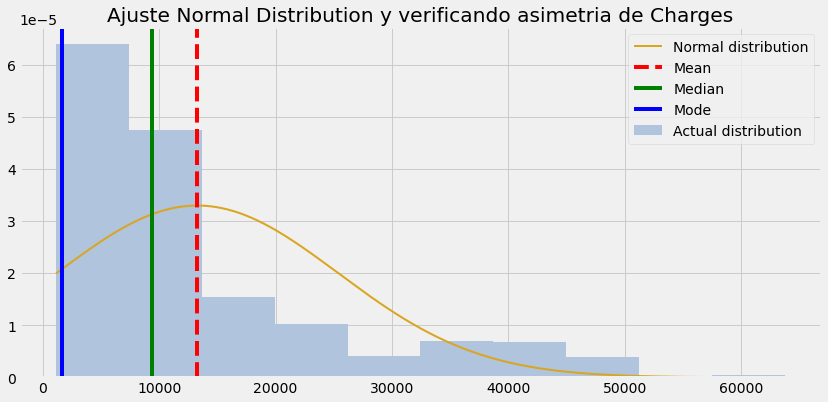

In [14]:
h = np.asarray(insurance['charges'])
h = sorted(h)
 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Ajuste Normal Distribution y verificando asimetria de Charges')

plt.legend(); plt.show()



La distribución de Charges posee una asimetria muy alta (1.5) por lo que su distribución no es normal

# Outliers

Formas de detectar valores atípicos

+ **Gráfico de caja (Box plot)**: en estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) que indican la variabilidad fuera de los cuartiles superior e inferior, de ahí los términos diagrama de caja y bigotes y diagrama de caja y bigotes. Los valores atípicos se pueden trazar como puntos individuales.


+ **Diagrama de dispersión (Scatter plot)**:  Un diagrama de dispersión es un tipo de diagrama que utiliza coordenadas cartesianas para mostrar valores de dos variables para un conjunto de datos. Los datos se muestran como una colección de puntos, cada uno con el valor de una variable que determina la posición en el eje horizontal y el valor de la otra variable que determina la posición en el eje vertical.


+ **Puntaje Z (Z Score)**: El puntaje Z es el número firmado de desviaciones estándar por el cual el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo. En la mayoría de los casos, se utiliza un umbral de 3 o -3, es decir, si el valor de la puntuación Z es mayor o menor que 3 o -3 respectivamente, ese punto de datos se identificará como valores atípicos.


+ **Puntaje IQR( IQR score)** : el rango intercuartil (IQR), o técnicamente H-spread, es una medida de dispersión estadística, que es igual a la diferencia entre los percentiles 75 y 25, o entre los cuartiles superior e inferior, IQR = Q3 - Q1. En otras palabras, el IQR es el primer cuartil sustraído del tercer cuartil; estos cuartiles se pueden ver claramente en un diagrama de caja en los datos. Es una medida de la dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a los valores atípicos.

,age,sex,bmi,children,smoker,region,charges


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier in Age')

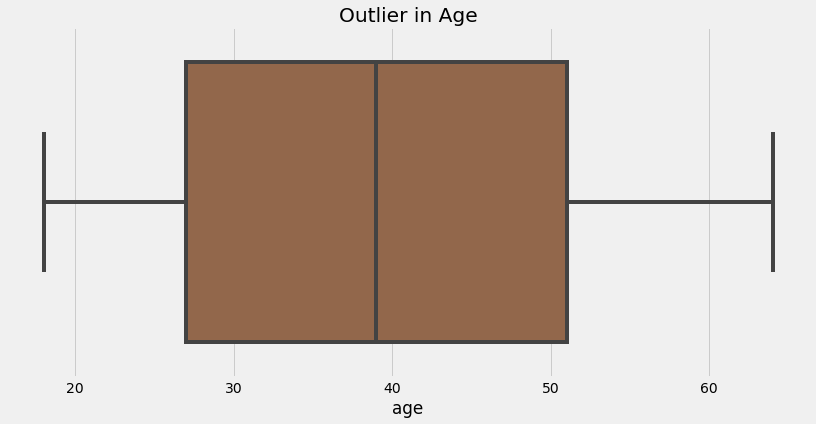

In [15]:
# Outliers en Age
Q3=insurance["age"].quantile(0.75)
Q1=insurance["age"].quantile(0.25)
IQR=Q3-Q1
display(insurance.loc[(insurance['age'] < (Q1 - 1.5 * IQR)) | (insurance['age'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['age'], palette = 'copper').set_title('Outlier in Age')

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier in Charges ')

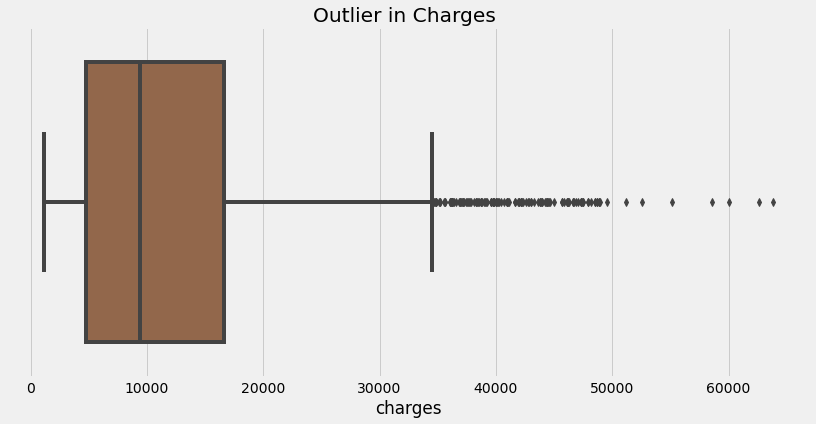

In [16]:
# Outliers en Charges
Q3 = insurance['charges'].quantile(0.75)
Q1 = insurance['charges'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance.loc[(insurance['charges'] < (Q1 - 1.5 * IQR)) | (insurance['charges'] > (Q3 + 1.5 * IQR))].head(5))

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['charges'], palette = 'copper').set_title('Outlier in Charges ')

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier in BMI')

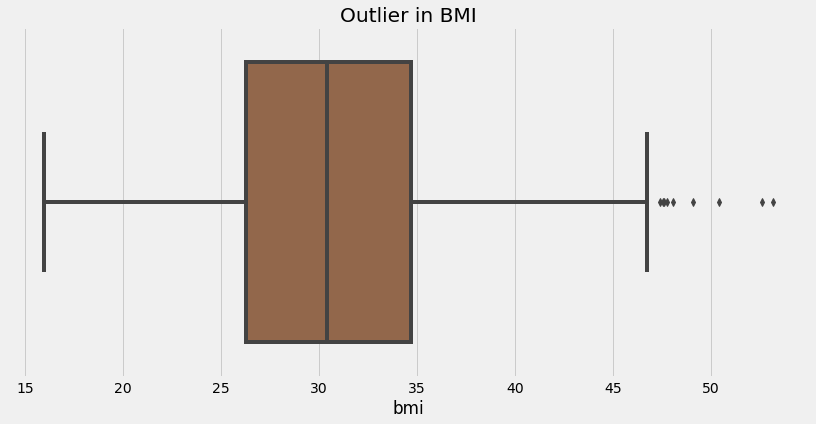

In [17]:


# Outliers in BMI
Q3 = insurance['bmi'].quantile(0.75)
Q1 = insurance['bmi'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance.loc[(insurance['bmi'] < (Q1 - 1.5 * IQR)) | (insurance['bmi'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['bmi'], palette = 'copper').set_title('Outlier in BMI')



Age no presenta outliers, no asi Charges y bmi

# Distribuciones de variables categoricas

In [18]:
#Convertir children a categorica
insurance['children'] = pd.Categorical(insurance['children'])

# reemplazar non-smoker por 0 y smoker por 1
insurance['smoker'] = insurance['smoker'].replace({'no': 0, 'yes': 1})

# reemplazar male por 1 y female por 0
insurance['sex'] = insurance['sex'].replace({'female': 0, 'male': 1})



<AxesSubplot:>

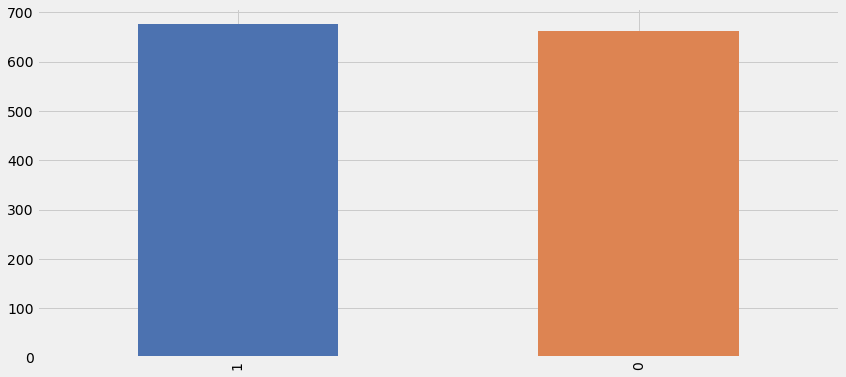

In [19]:
# SEX
plt.figure(figsize = (12.8 , 6))

insurance['sex'].value_counts().plot.bar(color = sns.color_palette('deep', 2))

<AxesSubplot:>

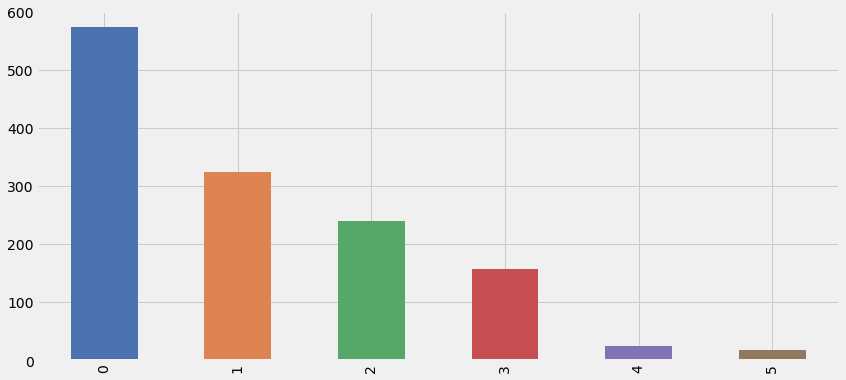

In [20]:
#Children
plt.figure(figsize = (12.8 , 6))

insurance['children'].value_counts().plot.bar(color = sns.color_palette('deep', 6))

<AxesSubplot:>

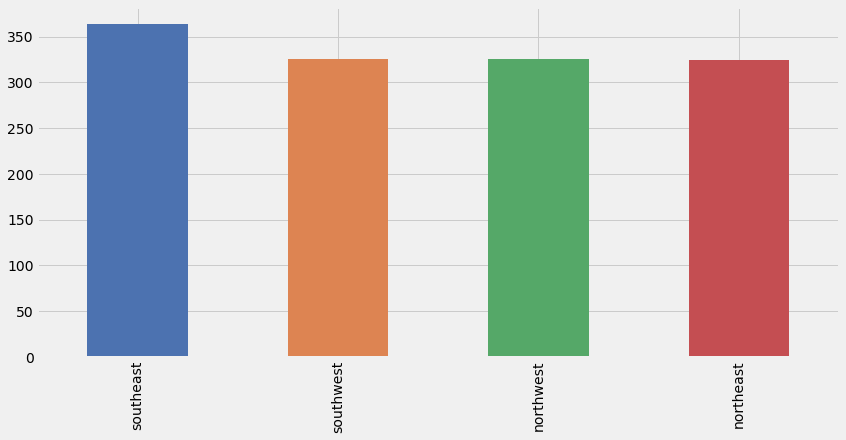

In [21]:
# Distribution of region
plt.figure(figsize = (12.8 , 6))

insurance['region'].value_counts().plot.bar(color = sns.color_palette('deep', 4))

Text(0.5, 1.0, 'Count of Smokers by Sex')

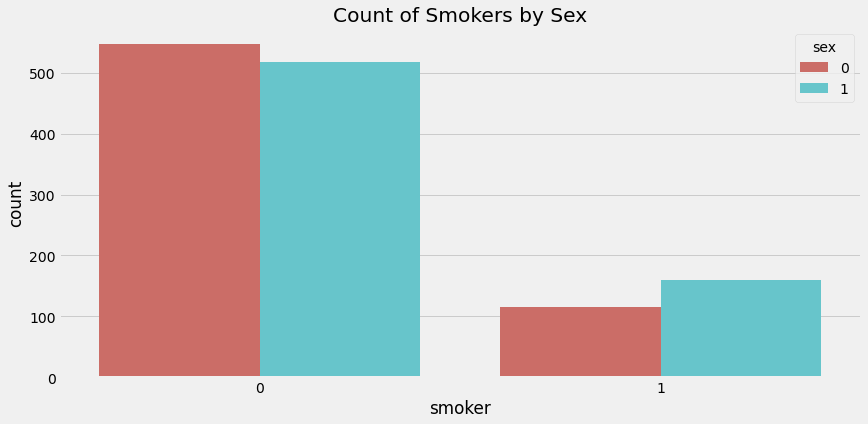

In [22]:


# Count of smokers vs sex, Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

sns.countplot(x = 'smoker', hue = 'sex', palette = 'hls', data = insurance).set_title('Count of Smokers by Sex')



## Distribución de charges para fumadores y no fumadores

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

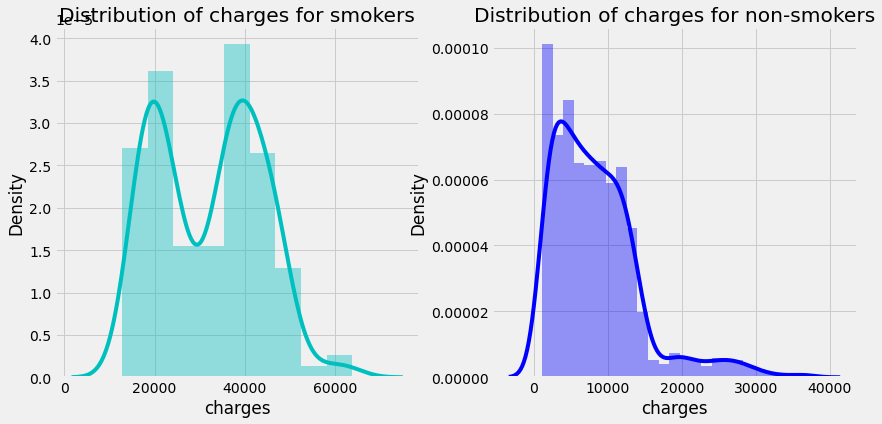

In [23]:
# Distribution of charges for smokers category
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(insurance[(insurance['smoker'] == 1)]['charges'], color = 'c', 
             ax = ax).set_title('Distribution of charges for smokers')

ax= fig.add_subplot(122)
sns.distplot(insurance[(insurance['smoker'] == 0)]['charges'], color = 'b', 
             ax = ax).set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Count of Smoker for Age >18 by Sex')

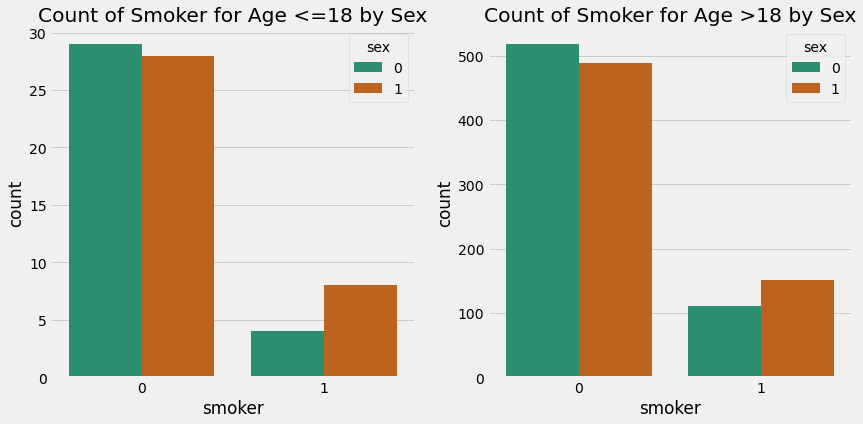

In [24]:
# Count of smokers vs age (<18 and >18)
# Sex: Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

ax = fig.subplots(1, 2)
sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance[(insurance['age'] <= 18)], ax = ax[0]).set_title('Count of Smoker for Age <=18 by Sex')

sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance[(insurance['age'] > 18)], ax = ax[1]).set_title('Count of Smoker for Age >18 by Sex')

Text(0.5, 1.0, 'Distribution of Charges for Male and Female by Smoker and Non-smokers')

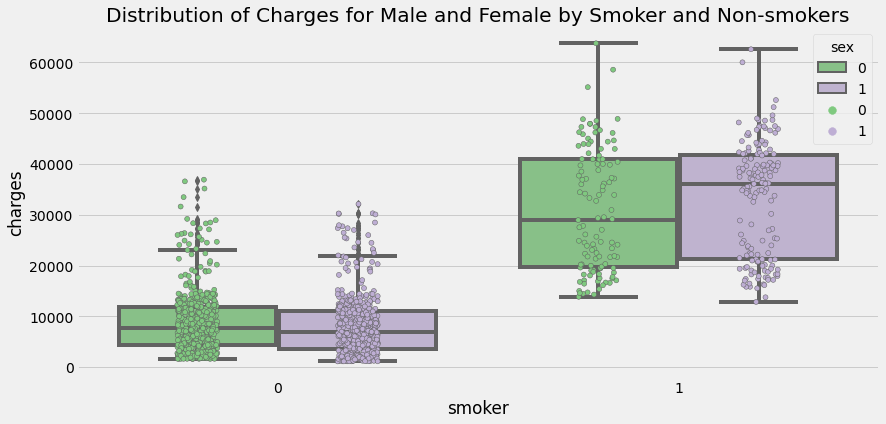

In [25]:

fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance)
ax = sns.stripplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges for Male and Female by Smoker and Non-smokers')

Text(0.5, 1.0, 'Distribution of Charges by Number of Children')

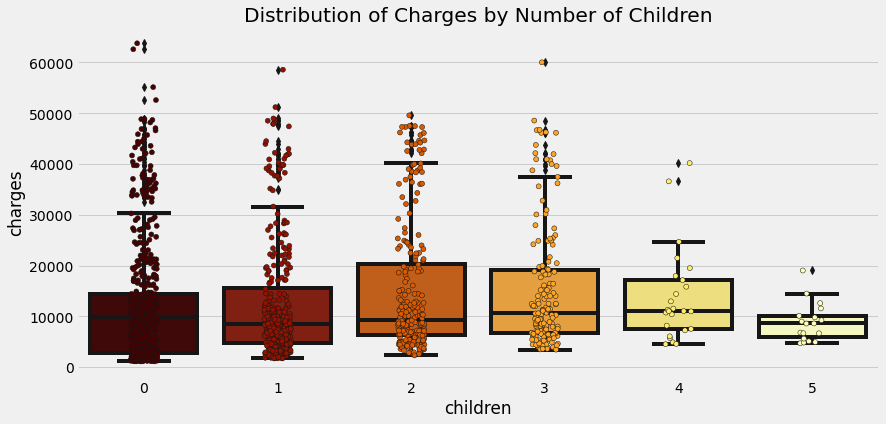

In [26]:
# Boxplot for medical charges by number of children
fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'children', y = 'charges', palette = 'afmhot', data = insurance)
ax = sns.stripplot(x = 'children', y = 'charges', palette = 'afmhot', data = insurance, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges by Number of Children')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for patients with BMI greater than 30')

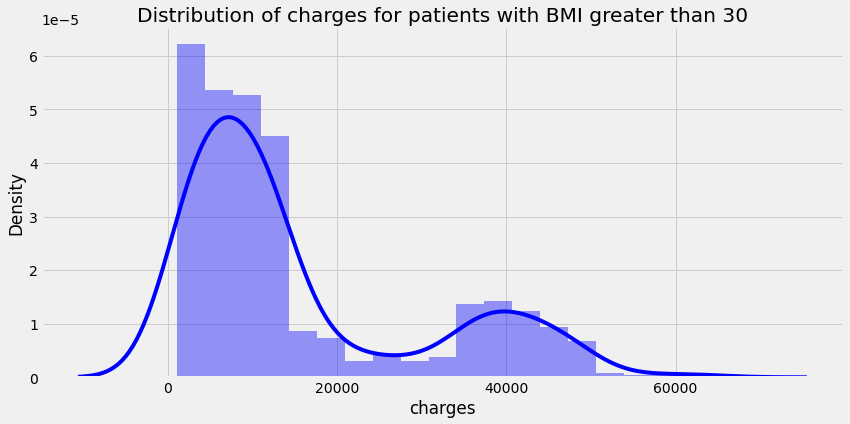

In [27]:
# Distribution of charges for patients with BMI greater than 30
fig = plt.figure(figsize = (12.8, 6))

sns.distplot(insurance[(insurance['bmi'] >= 30)]['charges'], color = 'b').set_title(
    'Distribution of charges for patients with BMI greater than 30')

## Evidencia estadística: los cargos de las personas que fuman difieren significativamente de las personas que no fuman

**Prueba T:** una prueba t es un tipo de estadística inferencial que se utiliza para determinar si hay una diferencia significativa entre las medias de dos grupos que pueden estar relacionadas en ciertas características.

**H0** = Los cargos para fumadores y no fumadores no difieren significativamente

**H1** = Los cargos para fumadores y no fumadores difieren significativamente

In [28]:
# Replace 0 with no and 1 with yes
insurance['smoker'] = insurance['smoker'].replace({0: 'no', 1: 'yes'})

# Replace 1 with male and 0 with female
insurance['sex'] = insurance['sex'].replace({0: 'female', 1: 'male'})

smokers = np.array(insurance[insurance['smoker'] == 'yes']['charges'])
non_smokers = np.array(insurance[insurance['smoker'] == 'no']['charges'])

print('Mean of Charges for Smokers: {}'.format(smokers.mean().round(2)))
print('Mean of Charges for Non-smokers: {}\n'.format(non_smokers.mean().round(2)))

#performing an independent T-test
t, p_value = stats.ttest_ind(smokers, non_smokers, axis = 0)
if p_value <0.05:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is significant. aka |We reject the null|')
    print('Charges differs significantly.')

else:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is not significant. aka |We fail to reject the null|')
    print("Charges don't differ significantly.")

Mean of Charges for Smokers: 32050.23
Mean of Charges for Non-smokers: 8434.27

With a p-value of 0.0 the difference is significant. aka |We reject the null|
Charges differs significantly.
